# Datacheck for OpSim 

## About

Inspect input data meant for the Simulator object. The "orbitals" data is stored and read in the HDF5 format and includes time axis in MJD, as well as the sun (alt, az) and the satellites.

In [1]:
# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2

# Standard imports and utility ---
import os
import sys

import numpy as np
import h5py

import yaml
import matplotlib.pyplot as plt
import simpy

print("Path:")
print("-------------------------------------")
for path_part in sys.path:
    if path_part!='': print(f'''{path_part}''')


# ---
import lusee        # Core lusee software
import nav          # Astro/observation wrapper classes
from   nav import *

import sim          # Simulation handler
import hardware     # hardware modules

#from hardware.parts import *; from hardware.panels import *;from hardware.controller import *; from hardware.battery import *

# ---

print(f'''simpy: {simpy.__version__}, lusee: {lusee.__version__}, sim: {sim.__version__}''')

Path:
-------------------------------------
/home/maxim/projects/lusee/opsim/notebooks
/home/maxim/projects/lusee/luseepy
/home/maxim/projects/lusee/opsim
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports
/usr/local/lib/python310.zip
/usr/local/lib/python3.10
/usr/local/lib/python3.10/lib-dynload
/home/maxim/.virtualenvs/lusee-simpy/lib/python3.10/site-packages
simpy: 4.0.2, lusee: 1.2-dev, sim: 0.1


In [3]:
prefab_file = "../data/2025-02-04_03-07.hdf5"
f = h5py.File(prefab_file, "r")

ds_meta = f["/meta/configuration"]
conf    = yaml.safe_load(ds_meta[0,])
metadata= yaml.dump(conf)

print('-----------------------------------------------')
print(f'''*** Metadata in the file {prefab_file} ***''')
print('-----------------------------------------------')
print(metadata)

ds_data = f["/data/orbitals"]
da = np.array(ds_data[:]) # data arrat
print(f'''Shape of the data payload: {da.shape}''')

print('-----------------------------------------------')
print(f'''*** Data payload in the file {prefab_file} ***''')
print('-----------------------------------------------')
print(f'''Shape of the data payload: {da.shape}''')

# Print slices if necessary: # print(data_array[0:3,1:2]) # print(data_array[:,1:2])

print(da[0:3,:])

-----------------------------------------------
*** Metadata in the file ../data/2025-02-04_03-07.hdf5 ***
-----------------------------------------------
location:
  height: 0
  latitude: -23.814
  longitude: 182.258
period:
  end: '2025-03-07 23:45:00'
  start: '2025-02-04 00:00:00'
satellites:
  elytra:
    aposelene_ref_time: '2024-05-01T00:00:00'
    argument_of_pericenter_deg: 72.625
    eccentricity: 0.56489
    inclination_deg: 57.097
    raan_deg: 0
    semi_major_km: 5738
  esa:
    aposelene_ref_time: '2024-05-01T00:00:00'
    argument_of_pericenter_deg: 72.625
    eccentricity: 0.56489
    inclination_deg: 57.097
    raan_deg: 0
    semi_major_km: 5738

Shape of the data payload: (3072, 7)
-----------------------------------------------
*** Data payload in the file ../data/2025-02-04_03-07.hdf5 ***
-----------------------------------------------
Shape of the data payload: (3072, 7)
[[ 6.07100000e+04  2.69659228e-01  4.81330973e+00 -1.09333839e-01
   4.75282666e+00 -1.093338

In [4]:
mySun = Sun(da[:,0], da[:,1] , da[:,2])
mySat = Sat(da[:,0], da[:,3] , da[:,4])

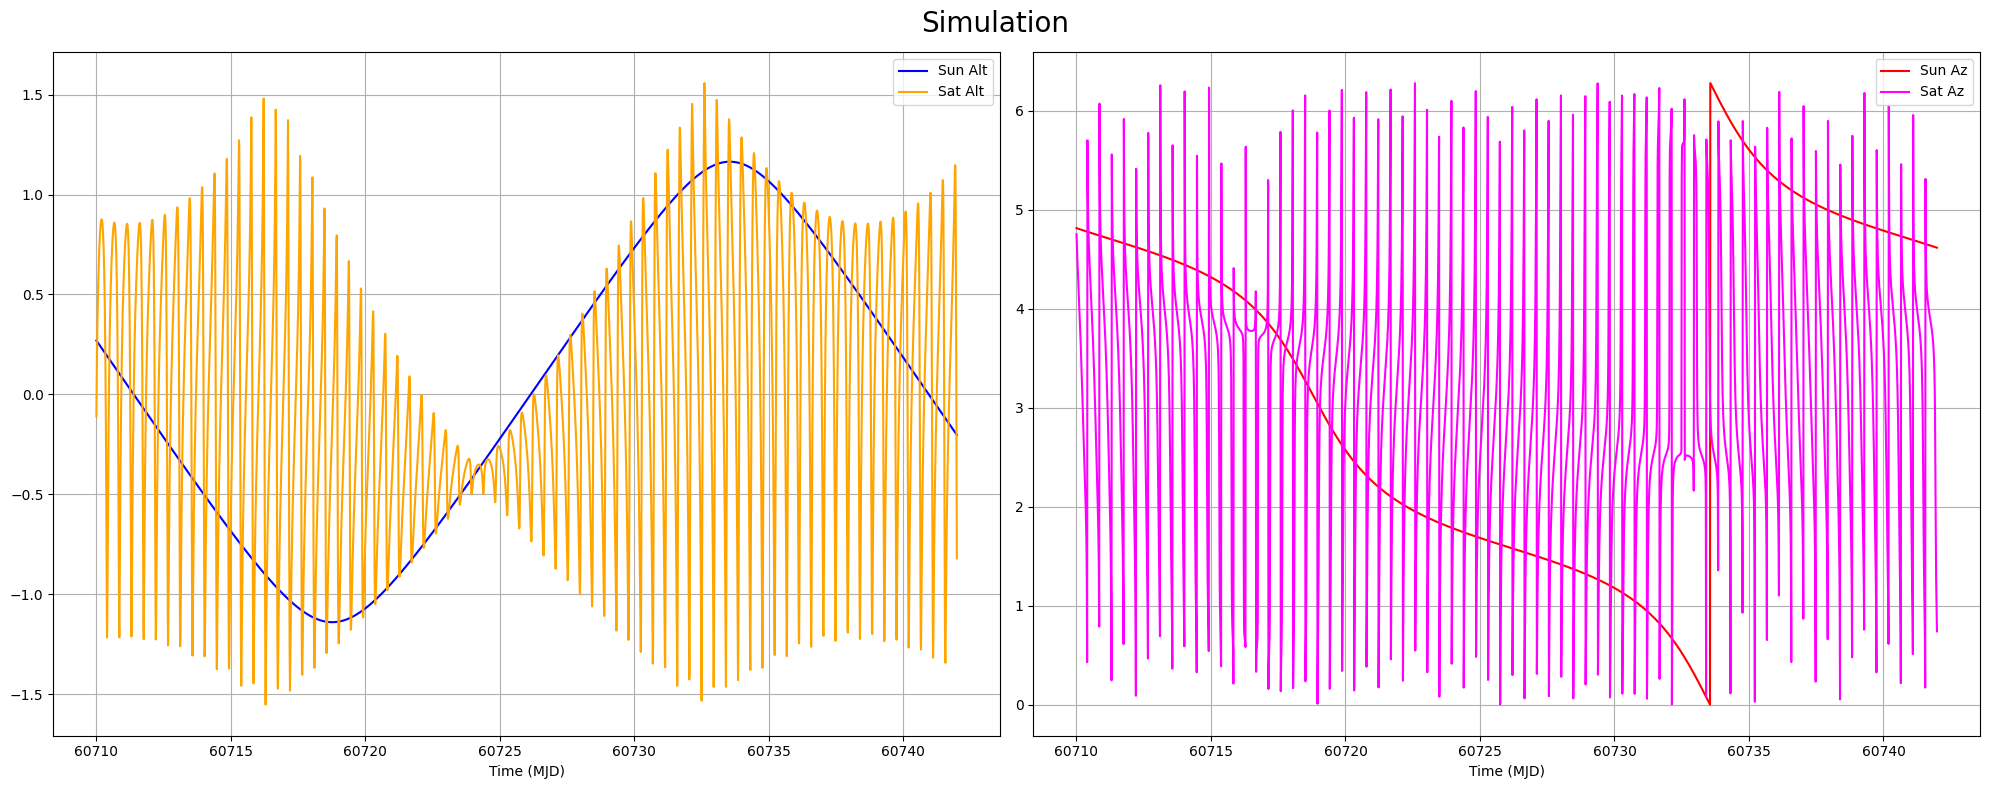

In [6]:
fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Simulation', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


p1.set_xlabel('Time (MJD)')
p2.set_xlabel('Time (MJD)')

p1.plot(mySun.mjd, mySun.alt,  color="blue",   label="Sun Alt")
p1.plot(mySat.mjd, mySat.alt,  color="orange", label="Sat Alt")

p2.plot(mySun.mjd, mySun.az, color="red",    label="Sun Az")
p2.plot(mySat.mjd, mySat.az, color="magenta",label="Sat Az")

p1.grid(True)
_ = p1.legend()

p2.grid(True)
_ = p2.legend()


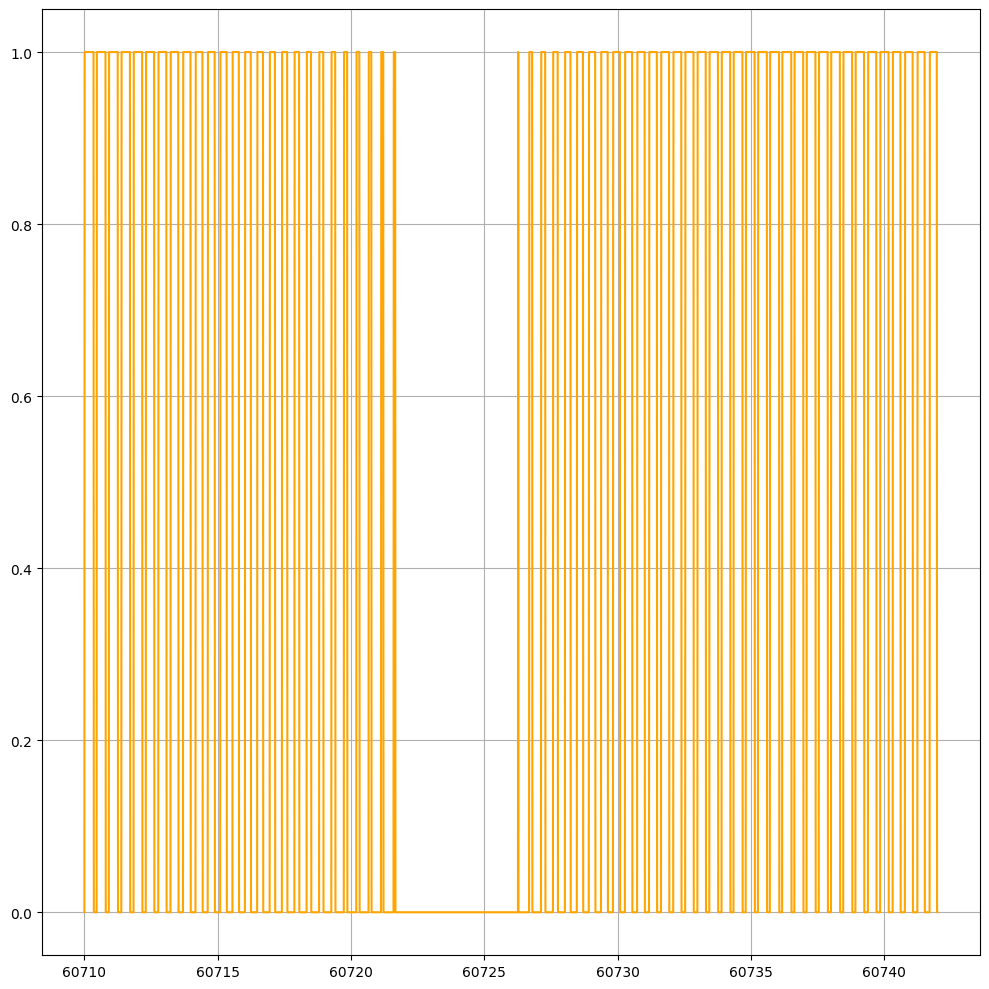

In [7]:
plt.rcParams["figure.figsize"] = [10., 10.]

ax=plt.subplot()
ax.plot(mySat.mjd, mySat.up,  color="orange", label="Sat Alt")
ax.grid(True)